In [1]:
# Supervised Learning Problem Set 1

In [2]:
# Load standard packages:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load functions from scikit-learn, a well-developed package for classic machine learning:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 1. Load the iris data set, using the seaborn package:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']

In [4]:
# 2. Split the Iris dataset into training and testing sets using train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 3. Train a LogisticRegression model on the training set:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [6]:
# 4. Evaluate the model’s performance on the test set using accuracy score:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 1.0000


In [7]:
# 5. Perform 5-fold cross-validation with KNeighborsClassifier using 3 nearest neighbors (k=3):
k_neighbors = KNeighborsClassifier(n_neighbors=3)
k_fold_scores = cross_val_score(k_neighbors, X, y, cv=5)
print(f'5-Fold Cross-Validation Accuracy: {np.mean(k_fold_scores):.4f}')

5-Fold Cross-Validation Accuracy: 0.9667


In [8]:
# 6. Find the best hyperparameter (number of nearest neighbors) using GridSearchCV:
param_grid = {'n_neighbors': np.arange(1, 11)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f'Optimal number of neighbors: {best_k}')

Optimal number of neighbors: 3


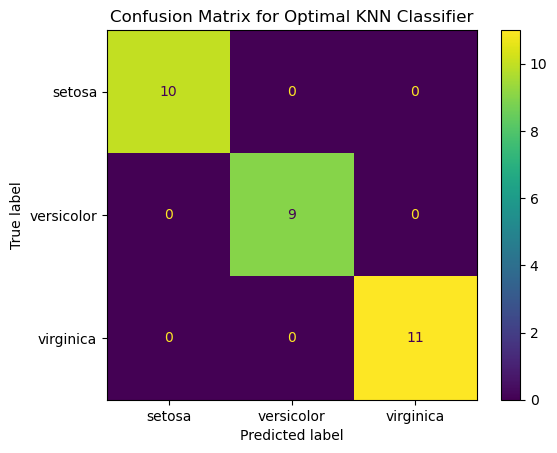

In [9]:
# 7. Compute and plot the confusion matrix for the best classifier
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(conf_matrix, display_labels=best_knn.classes_).plot()
plt.title('Confusion Matrix for Optimal KNN Classifier')
plt.show()